# Car Accident Severity Prediction


This notebook is a Data Preprocessing and Exploratory Data Analysis report using the data files from the UK road safety website available at https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data
Orginal data files names: " Road Safety- Vehicles last 5 years", "Road Safety- Collisions last 5 years"

# Table of Contents

1. Importing Libraries and Preparing Environment
2. Business Objective
3. Data Loading and Merging
4. Data Cleaning and Preprocessing
5. Exploratory Analysis
6. Correlation Analysis (Cramér's V)
7. Visualization of integer columns using both matplotlib and seaborn
8. Visualization of Categorical columns
9. Removal of Outliers from numerical columns using IQR
10. Data splitting

# 1. Importing Libraries and Preparing Environment

In [160]:
#Base Libraries
import pandas as pd #for working with tabular data
import numpy as np #for numerical arrays and mathematical operations

#Machine Learning Libraries(scikit-learn)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import chi2_contingency
#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


# 2. Business Objective

Enhancing car safety involves understanding factors influencing accident severity to refine vehicle designs, such as reinforcing side panels for T-bone collisions for example. Utilizing models helps prioritize resources for new safety features, focusing on areas with the highest impact on reducing severity. This knowledge also informs insurance strategies by assessing accident risks across car types and usage scenarios, shaping pricing and coverage options accordingly. Safer cars translate to reduced injuries, fatalities, and repair costs, benefiting both manufacturers and customers. Moreover, emphasizing data-driven safety measures can establish a competitive advantage, showcasing a commitment to consumer well-being. Overall, leveraging machine learning enhances safety, lowers costs, and boosts market competitiveness.
In this report, the team would be focusing on a single car model to build a minimum viable product(mvp) ML model. 


# 3. Data Loading and Merging


- Two CSV files related to collision data and vehicle data were loaded.
- The loaded datasets were merged on common columns: - Accident year, Accident reference and Accident index 

In [161]:
# Load the CSV files
collision_data = pd.read_csv('CO.csv', usecols=['accident_year','accident_reference','accident_index','road_type','accident_severity', 'number_of_casualties', 'road_surface_conditions', 'light_conditions','weather_conditions','special_conditions_at_site'],dtype={0: str, 2: str},low_memory=False)
vehicle_data = pd.read_csv('V.csv', usecols= ['accident_year','accident_reference','accident_index','propulsion_code', 'vehicle_manoeuvre', 'vehicle_type','first_point_of_impact', 'engine_capacity_cc', 'age_of_vehicle', 'generic_make_model'])

In [162]:
# Display the first few rows of the dataset 
collision_data.head()

,accident_index,accident_year,accident_reference,accident_severity,number_of_casualties,road_type,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site
0,2.02E+12,2018,10081429,3,1,2,4,9,9,9
1,2.02E+12,2018,10082256,3,1,9,4,9,9,9
2,2.02E+12,2018,10083071,3,1,9,4,9,9,9
3,2.02E+12,2018,10083548,3,1,9,1,9,9,9
4,2.02E+12,2018,10083822,3,1,9,1,9,9,9


In [163]:
# Display the first few rows of the dataset 
vehicle_data.head()

,accident_index,accident_year,accident_reference,vehicle_type,vehicle_manoeuvre,first_point_of_impact,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model
0,2.02E+12,2018,10080993,9,18,1,1198,1,3,NISSAN MICRA
1,2.02E+12,2018,10081157,9,18,1,1998,1,9,VAUXHALL ZAFIRA
2,2.02E+12,2018,10081164,9,9,3,1591,1,3,HYUNDAI IX20
3,2.02E+12,2018,10081598,9,18,4,1388,1,15,FORD FIESTA
4,2.02E+12,2018,10081723,9,99,9,1997,1,5,HONDA CRV


# 3.1 Merging datasets on common columns to create a new  combined dataset

In [164]:
# Merge datasets on common columns for combined information
car_df = pd.merge(vehicle_data, collision_data, on=['accident_index','accident_year','accident_reference'], how='outer')
# View basic structure of the merged dataset
car_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990153 entries, 0 to 990152
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   accident_index              990153 non-null  object
 1   accident_year               990153 non-null  int64 
 2   accident_reference          990153 non-null  object
 3   vehicle_type                990153 non-null  int64 
 4   vehicle_manoeuvre           990153 non-null  int64 
 5   first_point_of_impact       990153 non-null  int64 
 6   engine_capacity_cc          990153 non-null  int64 
 7   propulsion_code             990153 non-null  int64 
 8   age_of_vehicle              990153 non-null  int64 
 9   generic_make_model          990153 non-null  object
 10  accident_severity           990153 non-null  int64 
 11  number_of_casualties        990153 non-null  int64 
 12  road_type                   990153 non-null  int64 
 13  light_conditions            9

In [165]:
# Display a sample of the merged dataset
car_df.head() 

,accident_index,accident_year,accident_reference,vehicle_type,vehicle_manoeuvre,first_point_of_impact,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,accident_severity,number_of_casualties,road_type,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site
0,2.02E+12,2018,10080993,9,18,1,1198,1,3,NISSAN MICRA,2,1,6,4,1,1,0
1,2.02E+12,2018,10081157,9,18,1,1998,1,9,VAUXHALL ZAFIRA,3,1,6,1,1,2,0
2,2.02E+12,2018,10081157,9,10,3,-1,-1,-1,-1,3,1,6,1,1,2,0
3,2.02E+12,2018,10081157,9,4,2,1242,1,16,FORD FIESTA,3,1,6,1,1,2,0
4,2.02E+12,2018,10081164,9,9,3,1591,1,3,HYUNDAI IX20,3,1,6,1,1,1,0


In [166]:
# Check for missing values in each column
car_df.isnull().sum()

accident_index                0
accident_year                 0
accident_reference            0
vehicle_type                  0
vehicle_manoeuvre             0
first_point_of_impact         0
engine_capacity_cc            0
propulsion_code               0
age_of_vehicle                0
generic_make_model            0
accident_severity             0
number_of_casualties          0
road_type                     0
light_conditions              0
weather_conditions            0
road_surface_conditions       0
special_conditions_at_site    0
dtype: int64

In [167]:
# Count unique vehicle make/model combinations
unique_values_count=car_df["generic_make_model"].value_counts()

In [168]:
# Sort unique vehicle make/model combinations alphabetically 
unique_values_count.sort_index()

generic_make_model
-1                                258429
ABARTH 500                            84
ABARTH 595                           274
AJS DD 125                            20
AJS MODENA 125                        37
ALEXANDER DENNIS MODEL MISSING      1856
ALEXANDER DENNIS Model Missing      3079
ALFA ROMEO 147                        51
ALFA ROMEO 156                        19
ALFA ROMEO 159                       128
ALFA ROMEO GIULIA                     69
ALFA ROMEO GIULIETTA                 405
ALFA ROMEO GT                         29
ALFA ROMEO MITO                      397
ALFA ROMEO STELVIO                    10
APRILIA DORSODURO                      4
APRILIA MODEL MISSING                 32
APRILIA Model Missing                 63
APRILIA RS 125                        90
APRILIA RS4                           16
APRILIA RS50                          10
APRILIA SR 50                         66
APRILIA SR MOTARD 125                 10
APRILIA SX 125                        

In [169]:
# checking the number of car instances grouped by brand name 

# Create an empty dictionary to store counts by make
counts_by_make = {}

# Iterate through the value counts
for make_model, count in unique_values_count.items():
    make = make_model.split()[0]  # Extract the make from the make and model string
    if make in counts_by_make:
        counts_by_make[make] += count
    else:
        counts_by_make[make] = count

# Sort the counts by make according to the total count values
sorted_counts_by_make = dict(sorted(counts_by_make.items(), key=lambda item: item[1], reverse=True))

# Print the aggregated counts by make sorted by total count values
print("Aggregated counts by make (sorted by total count values):")
for make, total_count in sorted_counts_by_make.items():
    print(f"{make} - {total_count}")

Aggregated counts by make (sorted by total count values):
-1 - 258429
FORD - 94214
VAUXHALL - 76642
VOLKSWAGEN - 58609
BMW - 44258
MERCEDES - 43667
TOYOTA - 40395
HONDA - 37814
AUDI - 33142
PEUGEOT - 30689
NISSAN - 26973
RENAULT - 23394
CITROEN - 19615
SKODA - 13792
YAMAHA - 13710
VOLVO - 13465
HYUNDAI - 13107
KIA - 12924
FIAT - 12740
SEAT - 12487
LAND - 12162
MINI - 10993
SUZUKI - 10957
MAZDA - 7521
ALEXANDER - 4935
DAF - 4489
JAGUAR - 4470
MITSUBISHI - 3843
SCANIA - 3826
KAWASAKI - 2816
LEXUS - 2775
PIAGGIO - 2269
DACIA - 2180
LEXMOTO - 2045
SMART - 1892
TRIUMPH - 1891
Honda - 1857
WRIGHTBUS - 1836
IVECO - 1709
CHEVROLET - 1670
MAN - 1666
LONDON - 1559
PORSCHE - 1402
SAAB - 1230
ALFA - 1108
JEEP - 1097
MG - 1053
KTM - 978
SUBARU - 744
OPTARE - 732
TESLA - 696
SYM - 607
ROVER - 582
DS - 533
CHRYSLER - 520
HARLEY-DAVIDSON - 498
APRILIA - 429
Piaggio - 413
LEVC - 392
DENNIS - 383
KEEWAY - 378
ABARTH - 358
JOHN - 342
Yamaha - 340
ISUZU - 332
DAIHATSU - 272
SSANGYONG - 255
Suzuki - 224
BE

# 4. Data Cleaning and Preprocessing

- Filtered out missing values(-1) in object type columns and dropped corresponding rows.
- Filtered out missing values(-1) in integer type columns and dropped corresponding rows.
- Filtered out labels representing unknowns and dropped corresponding rows.
- Filtered rows based on specific conditions (age of vehicle(0-5), vehicle type(cars)).

In [170]:
# drops missing values in objects columns
car_df.replace('-1', pd.NA, inplace=True)
car_df.dropna(axis=0, how='any', inplace=True)
# drops missing values in integer columns
car_df.replace(-1, pd.NA, inplace=True)  # Replace -1 with NaN
car_df.dropna(axis=0, inplace=True)  # Drop rows with NaN values
car_df.dropna(axis=1, inplace=True)  # Drop columns with NaN values


In [171]:
# View basic structure of the dataset
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714649 entries, 0 to 990152
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   accident_index              714649 non-null  object
 1   accident_year               714649 non-null  int64 
 2   accident_reference          714649 non-null  object
 3   vehicle_type                714649 non-null  int64 
 4   vehicle_manoeuvre           714649 non-null  object
 5   first_point_of_impact       714649 non-null  object
 6   engine_capacity_cc          714649 non-null  object
 7   propulsion_code             714649 non-null  object
 8   age_of_vehicle              714649 non-null  object
 9   generic_make_model          714649 non-null  object
 10  accident_severity           714649 non-null  int64 
 11  number_of_casualties        714649 non-null  int64 
 12  road_type                   714649 non-null  int64 
 13  light_conditions            714649

In [172]:
# Restricted vehicle age range from 0 to 5 as manufacturers are more keen on recent model releases 
car_df=car_df[(car_df['age_of_vehicle'] <= 5) & (car_df['age_of_vehicle'] >= 0)]

In [173]:
#Restricted the vehicle type to only cars as to hoave a more accurate representation as different vehicle types have varying severity implications due to their structures.
car_df = car_df[car_df['vehicle_type'].isin([9, 8])].drop(columns=['vehicle_type'])


In [174]:
# removes all rows containing labels where the category is unknown
car_df = car_df[car_df['light_conditions'] != 7]
car_df = car_df[~car_df['weather_conditions'].isin([8, 9])]
car_df = car_df[car_df['road_surface_conditions'] != 9]
car_df = car_df[car_df['special_conditions_at_site'] != 9]
car_df = car_df[car_df['road_type'] != 9]
car_df = car_df[car_df['vehicle_manoeuvre'] != 99]
car_df = car_df[car_df['first_point_of_impact'] != 9]


In [175]:
# removes all rows with with missing car models from Generic make model column
car_df = car_df[~car_df['generic_make_model'].str.contains('Missing')]
car_df = car_df[~car_df['generic_make_model'].str.contains('MISSING')]

In [176]:
car_df.shape

(178578, 16)

# 4.1 Variable Notes
- Accident_index:
A unique identifier for each accident record. (Data type: object, strings)
- Accident_year:
The year in which the accident occurred. (Data type: int64, integers)
- Accident_reference:
another identifier for the accident. (Data type: object, strings)
- Vehicle_type: 
A numerical code representing the type of vehicle involved in the accident. (Data type: int64) 
- Propulsion_code: 
Type of fuel or power source used by the vehicle(Data type: Object, strings)
- Vehicle_manoeuvre:
Code describing the vehicle's action prior to the accident. (Data type: object, strings representing actions)
- First_point_of_impact: 
Where the vehicle was initially hit (front, side, etc.). (Data type: object)
- Engine_capacity_cc:
The volume of the engine's cylinders, typically measured in cubic centimeters (cc). A measure of engine power. (Data type: object, but might contain numerical data as strings)
- Age_of_vehicle : 
The age of the vehicle at the time of the accident. (Data type: object, likely strings due to potential units)
- Generic_make_model:
The manufacturer and model of the vehicle. (Data type: object)
- Accident_severity:
The severity rating of the accident (e.g., fatal, serious, slight). (Data type: int64)
- Number_of_casualties:
The total number of people injured or killed in the accident.(Data type: int64)
- Road_type:
A numerical code for the type of road where the accident occurred. (Data type: int64)
- Light_conditions:
The lighting conditions at the time of the accident (daylight, darkness, etc.). (Data type: object)
- Weather_conditions:
Weather conditions at the time of the accident (rain, snow, fog, etc.). (Data type: object)
- Road_surface_conditions:
Condition of the road surface at the time of the accident (dry, wet, icy, etc.).(Data type: object)
- Special_conditions_at_site:
Any unusual conditions at the accident location (roadworks, defective signals, etc.). (Data type: object)


# 5. Exploratory Analysis


- Reinvestigated unique values counts for the 'generic_make_model' column after data cleaning.
- Aggregated counts by car make
- Investigated correlations and patterns in the data using Cramer's V correlation matrix
- Converted several columns to appropriate  category data type.
- Converted the age of the vehicle to appropriate int64 data type
- Visualized histograms of integer columns using both matplotlib and seaborn.
- Visualized Bar chart of categorical columns using seaborn.

In [177]:
pd.set_option('display.max_rows', None)

In [178]:
#counting how many times each unique value appears
unique_values_count=car_df["generic_make_model"].value_counts()

In [179]:
#sorting the results of value_counts() alphabetically by the make and model values
unique_values_count.sort_index()

generic_make_model
ABARTH 500                          7
ABARTH 595                        211
ALFA ROMEO GIULIA                  65
ALFA ROMEO GIULIETTA              106
ALFA ROMEO MITO                    70
ALFA ROMEO STELVIO                 10
AUDI A1                          1992
AUDI A3                          2411
AUDI A4                          1234
AUDI A5                           743
AUDI A6                           844
AUDI A7                           165
AUDI A8                            64
AUDI Q2                           733
AUDI Q3                           907
AUDI Q5                           557
AUDI Q7                           317
AUDI Q8                            32
AUDI R8                            21
AUDI RS3                          108
AUDI RS4                           23
AUDI RS5                            8
AUDI RS6                           41
AUDI RSQ3                           6
AUDI S1                            28
AUDI S3                        

In [180]:
# Create an empty dictionary to store counts by make
counts_by_make = {}

# Iterate through the value counts
for make_model, count in unique_values_count.items():
    make = make_model.split()[0]  # Extract the make from the make and model string
    if make in counts_by_make:
        counts_by_make[make] += count
    else:
        counts_by_make[make] = count

# Sort the counts by make according to the total count values
sorted_counts_by_make = dict(sorted(counts_by_make.items(), key=lambda item: item[1], reverse=True))

# Print the aggregated counts by make sorted by total count values
print("Aggregated counts by make (sorted by total count values):")
for make, total_count in sorted_counts_by_make.items():
    print(f"{make} - {total_count}")

Aggregated counts by make (sorted by total count values):
FORD - 20433
VAUXHALL - 17843
BMW - 15674
VOLKSWAGEN - 14958
MERCEDES - 13758
AUDI - 11355
TOYOTA - 10778
NISSAN - 8081
PEUGEOT - 6851
KIA - 5723
SKODA - 5548
HYUNDAI - 5461
SEAT - 4464
LAND - 4422
RENAULT - 4294
CITROEN - 3965
MINI - 3407
FIAT - 2944
VOLVO - 2819
HONDA - 2761
SUZUKI - 2194
MAZDA - 1890
JAGUAR - 1611
DACIA - 1511
MITSUBISHI - 1058
LEXUS - 731
SMART - 631
PORSCHE - 565
MG - 504
JEEP - 485
DS - 400
LEVC - 275
ALFA - 251
ABARTH - 218
LONDON - 208
SSANGYONG - 181
SUBARU - 76
INFINITI - 75
CHEVROLET - 53
BENTLEY - 35
MASERATI - 31
CUPRA - 30
CHRYSLER - 22
PIAGGIO - 2
ISUZU - 2


In [181]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178578 entries, 0 to 990150
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   accident_index              178578 non-null  object
 1   accident_year               178578 non-null  int64 
 2   accident_reference          178578 non-null  object
 3   vehicle_manoeuvre           178578 non-null  object
 4   first_point_of_impact       178578 non-null  object
 5   engine_capacity_cc          178578 non-null  object
 6   propulsion_code             178578 non-null  object
 7   age_of_vehicle              178578 non-null  object
 8   generic_make_model          178578 non-null  object
 9   accident_severity           178578 non-null  int64 
 10  number_of_casualties        178578 non-null  int64 
 11  road_type                   178578 non-null  int64 
 12  light_conditions            178578 non-null  object
 13  weather_conditions          178578

In [182]:
# Keep only rows where 'vehicle_type' is the FORD FIESTA model
car_df = car_df[car_df['generic_make_model'].isin(['FORD FIESTA'])]

# Drop the 'generic_make_model ' column
car_df = car_df.drop(columns=['generic_make_model'])


In [183]:
#calculating the number of instances for each unique engine capacity
car_df.value_counts(['engine_capacity_cc'])

engine_capacity_cc
998                   4219
1242                  1443
1499                   486
1596                   458
1084                   450
999                    340
1496                   116
1560                    91
1000                     1
1399                     1
1600                     1
Name: count, dtype: int64

# Converted columns to appropriate data types

In [184]:
columns_to_convert = ['propulsion_code','accident_severity','light_conditions','first_point_of_impact','road_surface_conditions', 'weather_conditions','special_conditions_at_site','vehicle_manoeuvre','road_type','engine_capacity_cc']
# Convert the selected columns to categorical data type
for column in columns_to_convert:
    car_df[column] = car_df[column].astype('category')

In [185]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7606 entries, 109 to 989665
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   accident_index              7606 non-null   object  
 1   accident_year               7606 non-null   int64   
 2   accident_reference          7606 non-null   object  
 3   vehicle_manoeuvre           7606 non-null   category
 4   first_point_of_impact       7606 non-null   category
 5   engine_capacity_cc          7606 non-null   category
 6   propulsion_code             7606 non-null   category
 7   age_of_vehicle              7606 non-null   object  
 8   accident_severity           7606 non-null   category
 9   number_of_casualties        7606 non-null   int64   
 10  road_type                   7606 non-null   category
 11  light_conditions            7606 non-null   category
 12  weather_conditions          7606 non-null   category
 13  road_surface_condit

In [186]:
import pandas as pd

columns_to_convert = ['age_of_vehicle']
# Convert the selected columns to integer64 data type
for column in columns_to_convert:
    car_df[column] = car_df[column].astype('int64')

In [187]:
car_df.drop('accident_index', axis=1, inplace=True)
car_df.drop('accident_year', axis=1, inplace=True)
car_df.drop('accident_reference', axis=1, inplace=True)
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7606 entries, 109 to 989665
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   vehicle_manoeuvre           7606 non-null   category
 1   first_point_of_impact       7606 non-null   category
 2   engine_capacity_cc          7606 non-null   category
 3   propulsion_code             7606 non-null   category
 4   age_of_vehicle              7606 non-null   int64   
 5   accident_severity           7606 non-null   category
 6   number_of_casualties        7606 non-null   int64   
 7   road_type                   7606 non-null   category
 8   light_conditions            7606 non-null   category
 9   weather_conditions          7606 non-null   category
 10  road_surface_conditions     7606 non-null   category
 11  special_conditions_at_site  7606 non-null   category
dtypes: category(10), int64(2)
memory usage: 255.4 KB


In [188]:
car_df.head()

,vehicle_manoeuvre,first_point_of_impact,engine_capacity_cc,propulsion_code,age_of_vehicle,accident_severity,number_of_casualties,road_type,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site
109,18,2,1242,1,5,3,1,6,1,1,1,0
122,5,1,998,1,4,2,1,6,1,1,1,0
205,18,4,998,1,1,2,1,3,5,1,1,0
463,4,2,998,1,0,3,2,3,1,1,1,0
466,2,2,1242,1,5,3,2,3,1,1,1,0


# New Datatype for variables

- Vehicle_manoeuvre	|  category
- First_point_of_impact	| category
- Engine_capacity_cc	| category
- Propulsion_code	| category
- Age_of_vehicle	| int64
- Accident_severity	| category
- Number_of_casualties	| int64
- Road_type		| category
- Light_conditions	| category
- Weather_conditions	| category
- Road_surface_conditions	| category
- Special_conditions_at_site	| category

# Replacing Encoded values with their actual labels for better visualization



In [189]:
# Define mappings for coded categories to labels for all columns
mappings = {
    'accident_severity': {1: 'Fatal', 2: 'Serious', 3: 'Slight'},
    'light_conditions': {1: 'Daylight', 4: 'Darkness - lights lit', 5: 'Darkness - lights unlit', 6: 'Darkness - no lighting'},
    'weather_conditions': {1: 'Fine no high winds', 2: 'Raining no high winds', 3: 'Snowing no high winds', 4: 'Fine + high winds', 5:'Raining + high winds', 6:'Snowing + high winds',7:'Fog or mist'
},
    'road_surface_conditions': {1: 'Dry', 2: 'Wet or Damp', 3: 'Snow', 4: 'Frost or ice', 5:'Flood over 3cm. Deep', 6:'Oil or Diesel', 7:'Mud'},
    'special_conditions_at_site': {0:'None', 1: 'Auto traffic signal - out', 2: 'Auto signal part defective', 3: 'Road sign or marking defective or obscured', 4: 'Roadworks', 5:'Road surface defective', 6:'Oil or Diesel', 7:'Mud'},
    'road_type': {1: 'Roundabout', 2: 'One way street', 3: 'Dual carriageway', 6: 'Single carriageway', 7:'Slip road', 12:'One way street/Slip road'},
    'first_point_of_impact': {0:'Did not impact',1: 'Front', 2: 'Back', 3: 'Offside', 4:'Nearside'},
    'vehicle_manoeuvre':  {1:'Reversing', 2:'Parked', 3:'Waiting to go - held up', 4:'Slowing or stopping', 5:'Moving off', 6:'U-turn', 7:'Turning left', 8:'Waiting to turn left', 9:'Turn right', 10:'Waiting to turn right', 11:'Changing lane to left', 12:'Changing lane to right', 13:'Overtaking moving vehicle - offside', 14:'Overtaking static vehicle - offside', 15:'Overtaking - nearside', 16:'Going ahead left-hand bend', 17:'Going ahead right-hand bend', 18:'Going ahead other'
},
    'propulsion_code':  {1:'Petrol', 2:'Heavy oil', 3:'Electric', 4:'Steam', 5:'Gas', 6:'Petrol/Gas(LPG)', 7:'Gas/Bi-fuel', 8:'Hybrid electric', 9:'Gas Diesel', 10:'New fuel technology', 11:'Fuel cells', 12:'Electric diesel'},
}
   


# Apply mappings to all specified columns
car_df.replace(mappings, inplace=True)

# display the updated dataframe
car_df.head()


,vehicle_manoeuvre,first_point_of_impact,engine_capacity_cc,propulsion_code,age_of_vehicle,accident_severity,number_of_casualties,road_type,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site
109,Going ahead other,Back,1242,Petrol,5,Slight,1,Single carriageway,Daylight,Fine no high winds,Dry,None
122,Moving off,Front,998,Petrol,4,Serious,1,Single carriageway,Daylight,Fine no high winds,Dry,None
205,Going ahead other,Nearside,998,Petrol,1,Serious,1,Dual carriageway,Darkness - lights unlit,Fine no high winds,Dry,None
463,Slowing or stopping,Back,998,Petrol,0,Slight,2,Dual carriageway,Daylight,Fine no high winds,Dry,None
466,Parked,Back,1242,Petrol,5,Slight,2,Dual carriageway,Daylight,Fine no high winds,Dry,None


# 6. Correlation Analysis (Cramér's V)



In [190]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Assuming 'car_df' is your DataFrame containing the data
# If not, replace 'car_df' with your DataFrame name

# Define a function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Create an empty DataFrame to store the results
cramer_v_matrix = pd.DataFrame(index=car_df.columns, columns=car_df.columns)

# Calculate Cramér's V for each pair of columns
for i in range(len(car_df.columns)):
    for j in range(i, len(car_df.columns)):
        col1 = car_df.columns[i]
        col2 = car_df.columns[j]
        cramer_v_matrix.loc[col1, col2] = cramers_v(car_df[col1], car_df[col2])
        cramer_v_matrix.loc[col2, col1] = cramer_v_matrix.loc[col1, col2]  # Assign symmetric value

# Display the correlation matrix
print("Cramér's V Correlation Matrix:")
print(cramer_v_matrix)


Cramér's V Correlation Matrix:
                           vehicle_manoeuvre first_point_of_impact  \
vehicle_manoeuvre                        1.0              0.304785   
first_point_of_impact               0.304785                   1.0   
engine_capacity_cc                  0.043966              0.021275   
propulsion_code                          0.0                   0.0   
age_of_vehicle                           0.0              0.008904   
accident_severity                   0.085905              0.078465   
number_of_casualties                0.033298              0.036463   
road_type                           0.144541              0.078189   
light_conditions                    0.133091              0.058776   
weather_conditions                  0.016484                   0.0   
road_surface_conditions             0.033968              0.014716   
special_conditions_at_site          0.030367              0.007687   

                           engine_capacity_cc propulsion_c

# Analysis of Feature Relationships Using Cramér's V Correlation Matrix

The Cramér's V correlation matrix above shows the relationships among the various features used in this accident severity prediction experiment. Cramér's V values range from 0 (no association) to 1 (strong association), and this matrix provides insight into the interdependencies among the predictor variables and their potential predictive power for accident severity.

## Key Observations from the Correlation Matrix

### 1. Strongest Correlations
- The highest correlation is between **engine capacity** and **propulsion code** (0.9994), likely because propulsion type (e.g., electric, diesel) is often related to engine specifications. However, this strong association did not contribute much to the prediction of accident severity, indicating limited relevance.
- **Weather conditions** and **road surface conditions** show a moderate correlation (0.4728). This is expected as certain weather conditions (e.g., rain or snow) naturally affect road surface states. These features could indirectly affect accident severity by influencing the likelihood of an accident, although they may not directly impact severity outcomes.

### 2. Moderate Correlations
- **Vehicle maneuver** has a moderate correlation with **first point of impact** (0.3048) and **road type** (0.1445). This reflects logical relationships, as certain maneuvers are more common or dangerous on particular road types, and the impact point can often depend on the maneuver.
- **Light conditions** and **road surface conditions** (0.1477) also showed some relationship. Poor light conditions can exacerbate poor road surface effects, potentially contributing to accident risk. This, however, doesn’t strongly correlate with accident severity.

### 3. Low Correlations with Accident Severity
- Most features, including **road type**, **first point of impact**, and **light conditions**, showed only weak correlations with **accident severity** (all below 0.1). This suggests that the available features do not capture key elements that would drive the difference in accident severity.
- The highest correlation with **accident severity** was with **number of casualties** (0.1052). However, this is an indirect measure since more casualties may be expected in more severe accidents, though it is not a causal predictor.

## Implications for Model Performance
The low correlations between **accident severity** and most features highlight the challenges faced in this experiment:
- The prediction models struggled to classify "slight" and "severe" accidents effectively, likely due to the lack of directly relevant features for accident severity. Most features in the dataset (such as light conditions, weather, road type) are factors associated with the likelihood of an accident occurring but are less useful for predicting the **severity** of those accidents once they happen.
- **Limited Predictive Features**: Features that would more directly influence accident severity, such as vehicle speed at the time of the accident, the use of safety equipment (e.g., seat belts or airbags), and detailed driver information (e.g., age, reaction time), were not available. These variables could potentially provide more direct insight into the factors that differentiate fatal, severe, and slight accidents.

## Need for Enhanced Data Collection
To improve the predictive power for accident severity, the following data should be considered:

### 1. Vehicle-Specific Dynamics
- **Speed at impact**: Higher speeds are strongly associated with more severe accidents, as the force of impact increases.
- **Safety features**: Information on airbag deployment, seatbelt usage, or vehicle safety ratings can inform the potential impact severity.

### 2. Driver Behavior and Condition
- **Driver impairment factors** such as alcohol or drug influence could provide insights into the severity likelihood.
- **Driver age, experience, and reaction times** are important variables influencing accident outcomes.

### 3. Accident-Specific Environmental Data
- **Accident location** specifics, such as intersections, curves, or rural roads, can be more telling than generalized road types.
- **Emergency response time** could also be a proxy for the severity outcome since quicker responses may mitigate injuries.

### 4. Enhanced Weather and Road Data
- Detailed weather data beyond general conditions, like visibility distance and real-time precipitation rates, could strengthen the understanding of accident severity contexts.

## Conclusion
In conclusion, the low correlation values between the features and accident severity underscore the need for better data to improve predictive modeling. While this dataset contained factors that are generally associated with accident risk, it lacked critical variables that more directly influence accident severity. Including additional features that capture accident dynamics, driver behavior, and specific environmental conditions would be essential for building more accurate and meaningful severity prediction models. This expanded data collection would enable models to better distinguish between fatal, severe, and slight accidents, potentially improving both prediction quality and practical application in traffic safety initiatives.

# 7. Visualization of integer columns using both matplotlib and seaborn

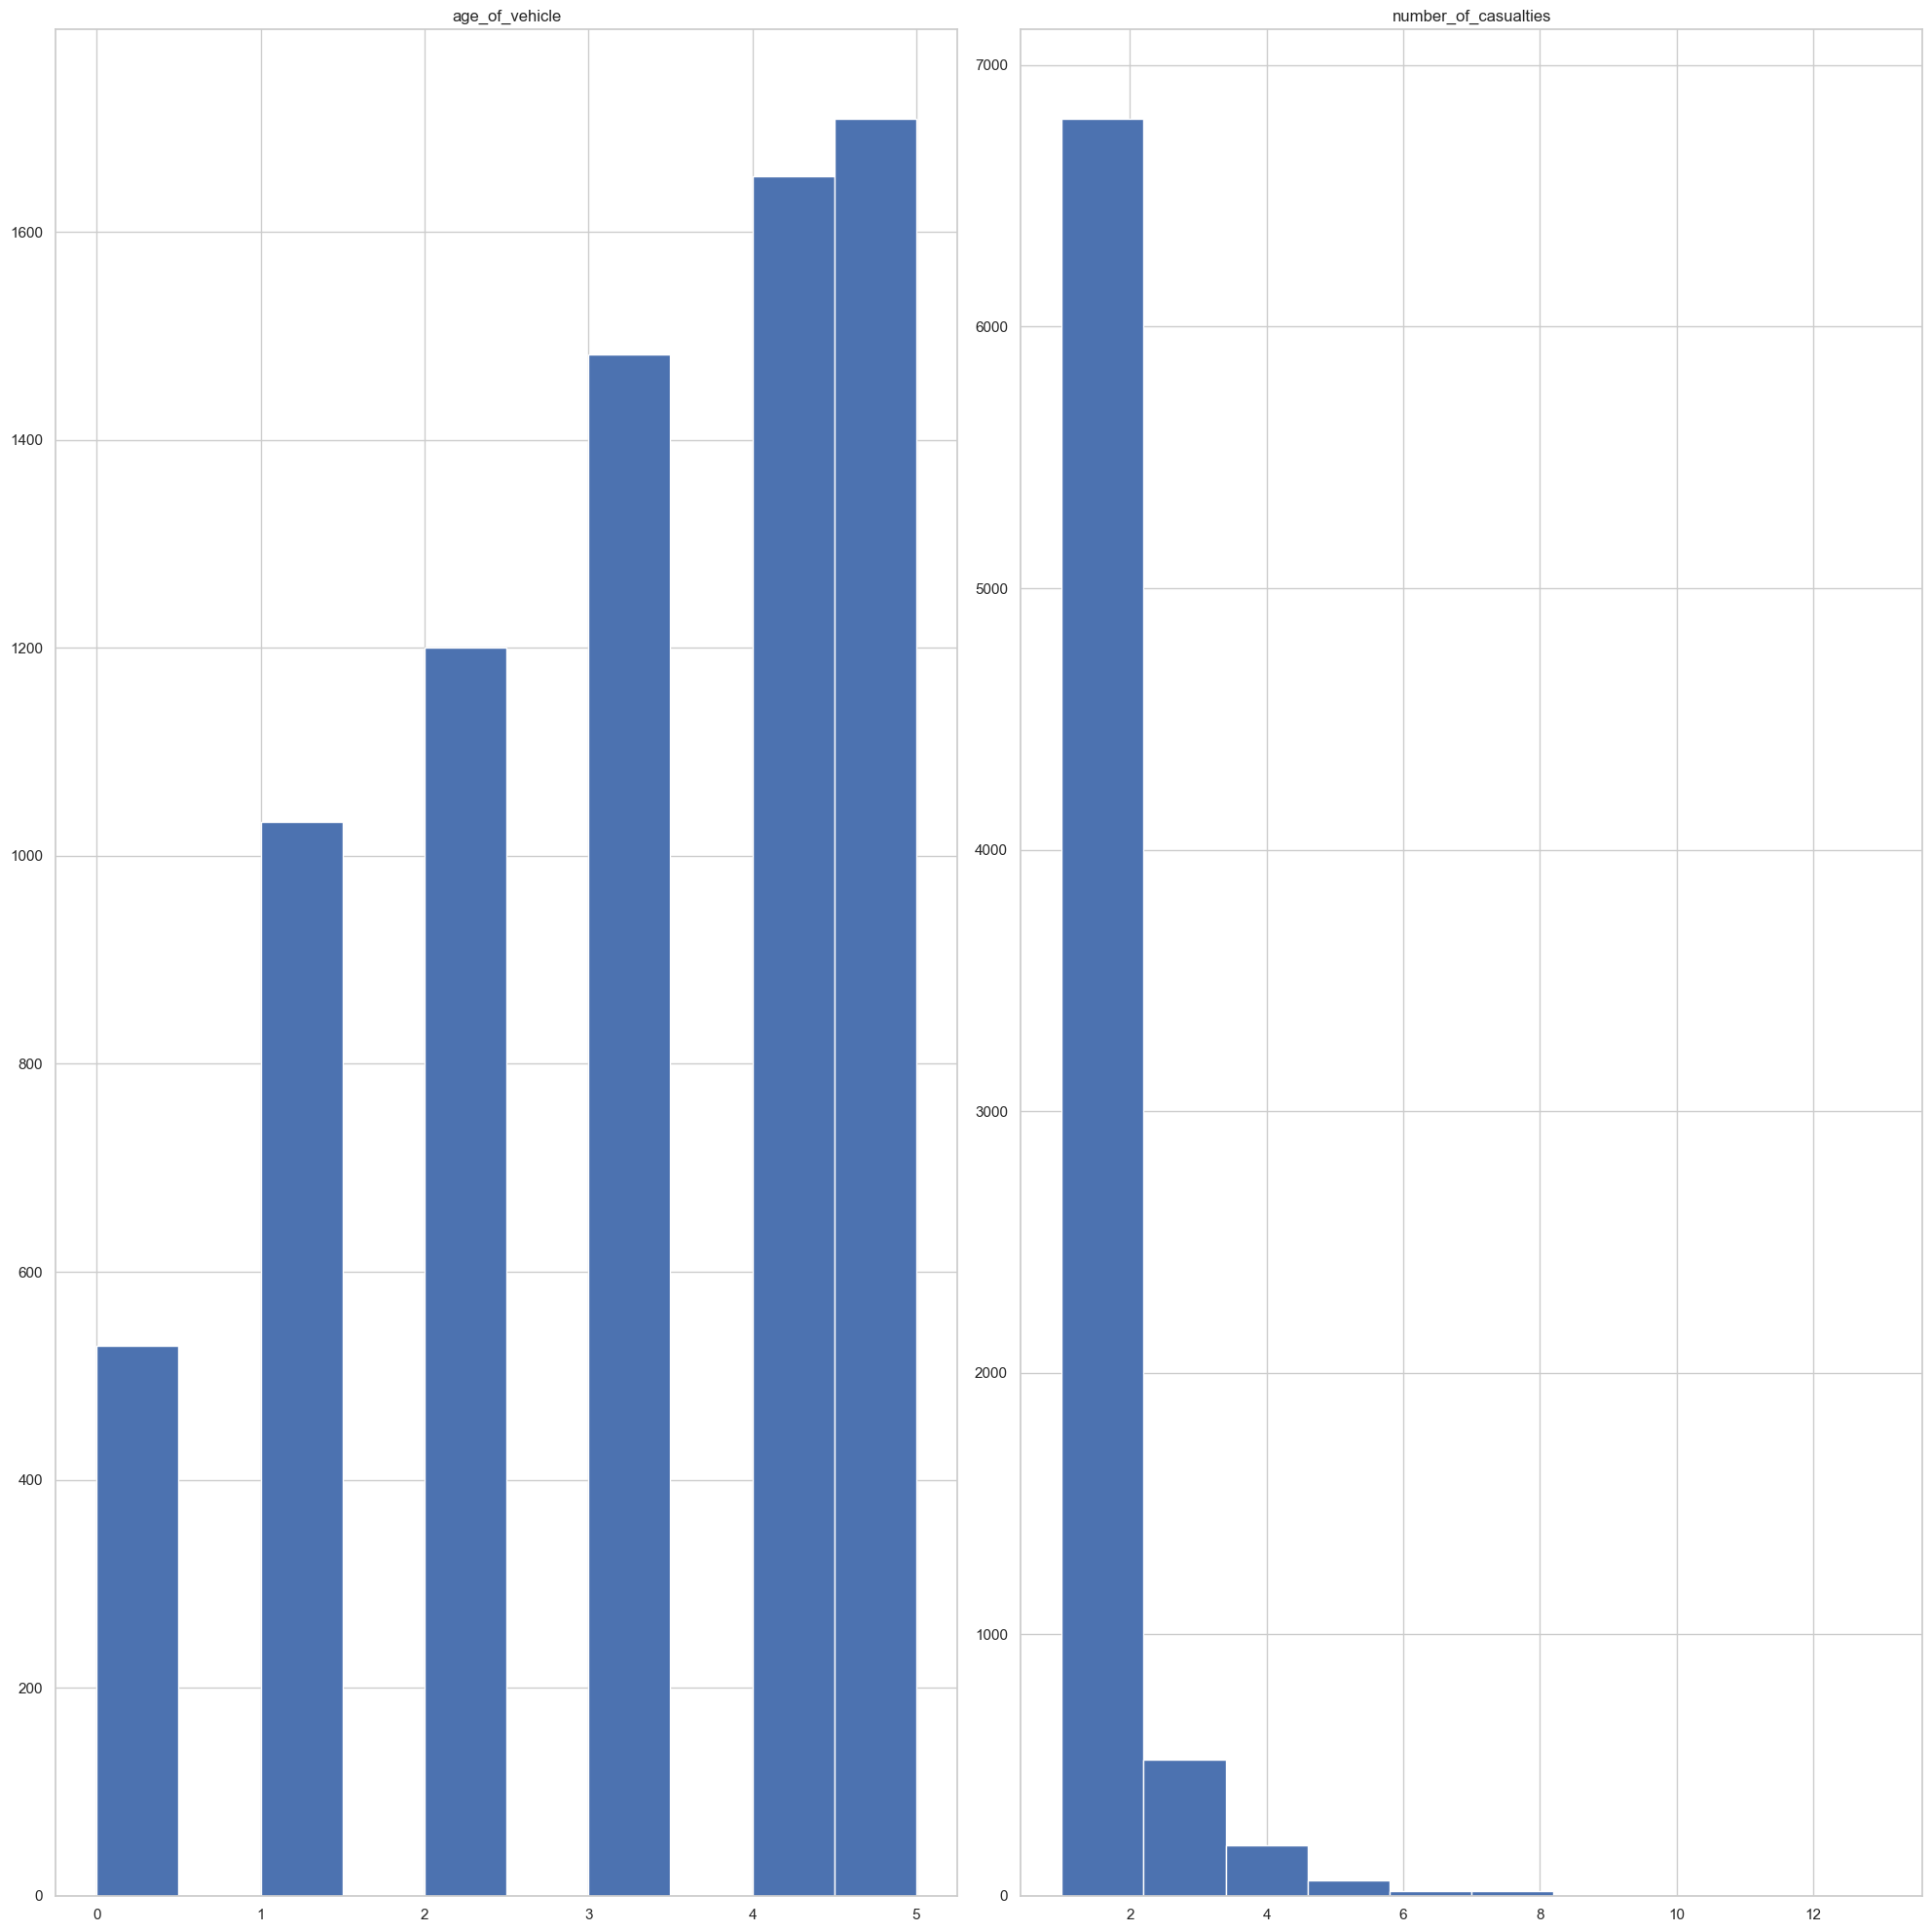

In [191]:
#ploting basic histogram
car_df.hist(figsize=(20, 20))
plt.tight_layout()
plt.show()

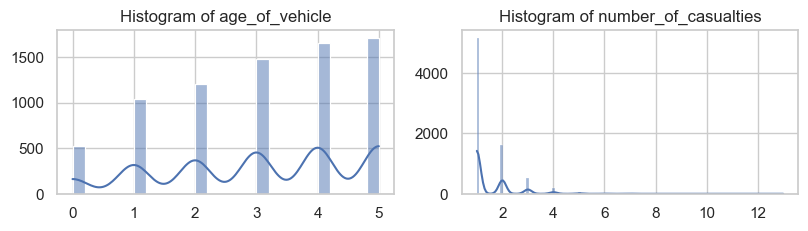

In [192]:
# Filter integer columns
integer_columns = car_df.select_dtypes(include='int64').columns

# Set the style
sns.set(style="whitegrid")

# Plot histograms using Seaborn
plt.figure(figsize=(20, 20))
for i, col in enumerate(integer_columns):
    plt.subplot(8, 4, i+1)  # Adjust the subplot grid as per the number of columns in your DataFrame
    sns.histplot(car_df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel('')
    plt.ylabel('')

plt.show()


- The histogram reveal the distributions of the interger-based features in the dataset

# 8. Visualization of Categorical columns

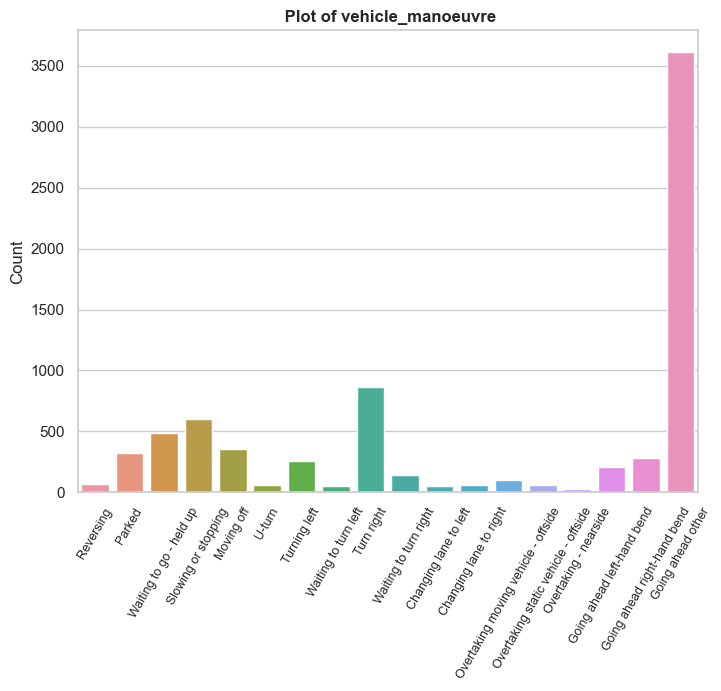

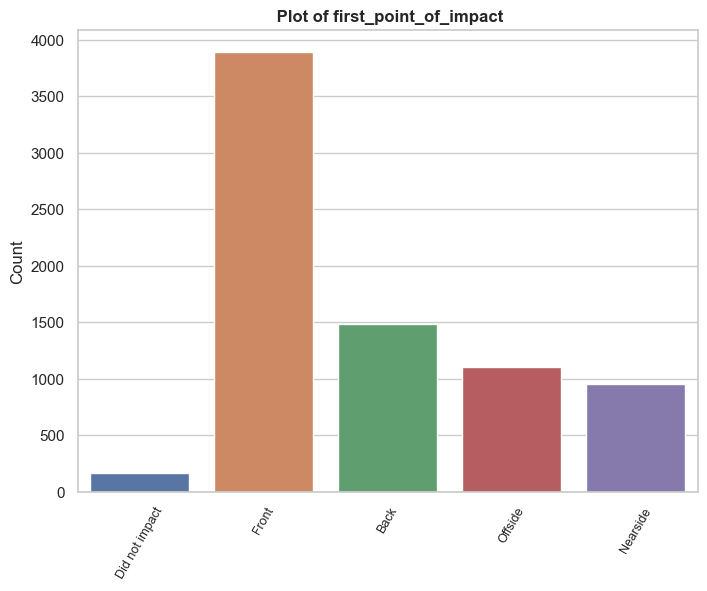

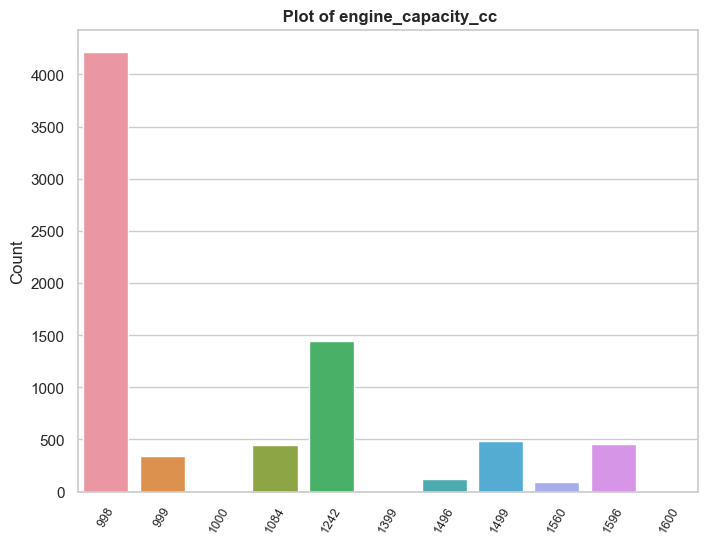

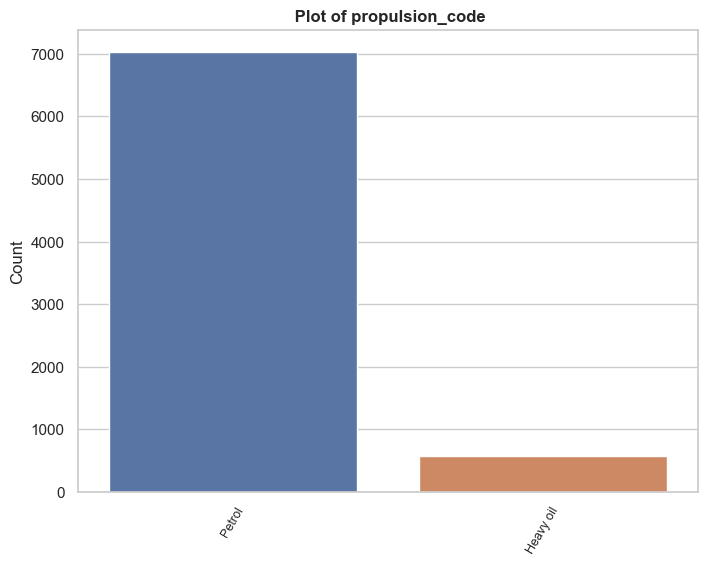

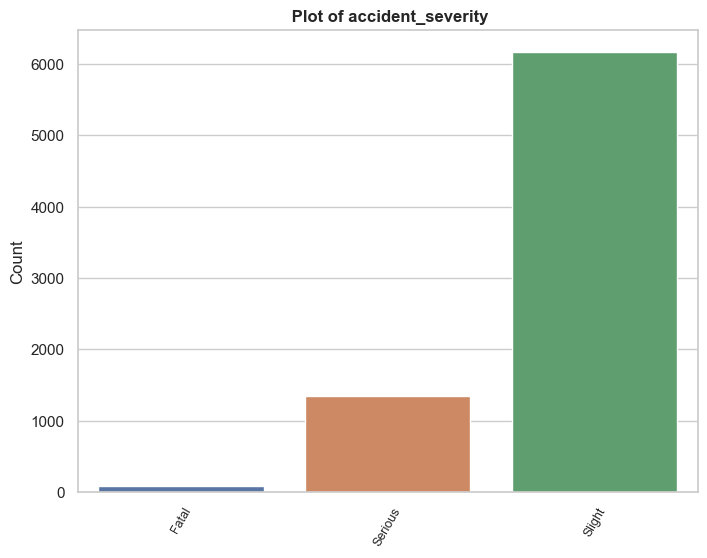

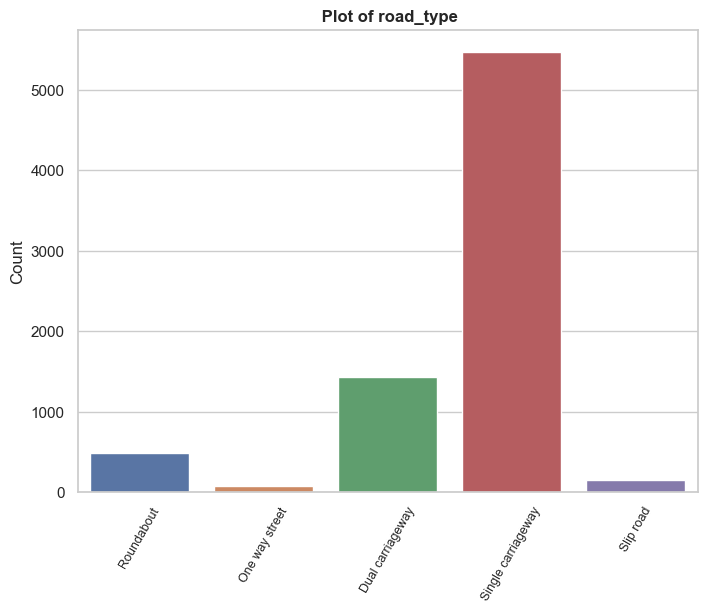

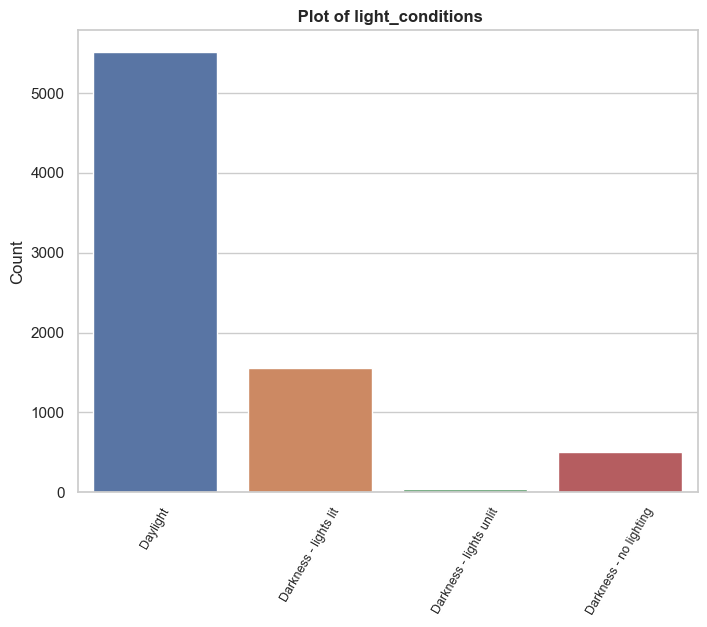

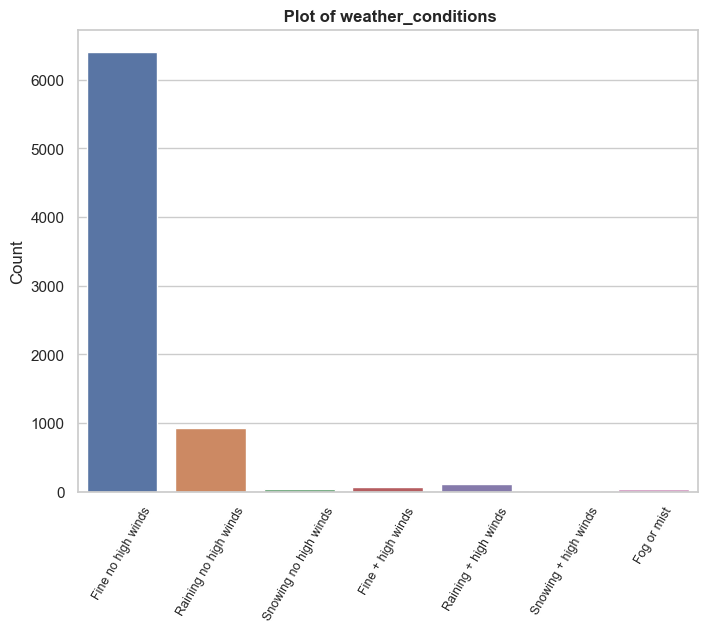

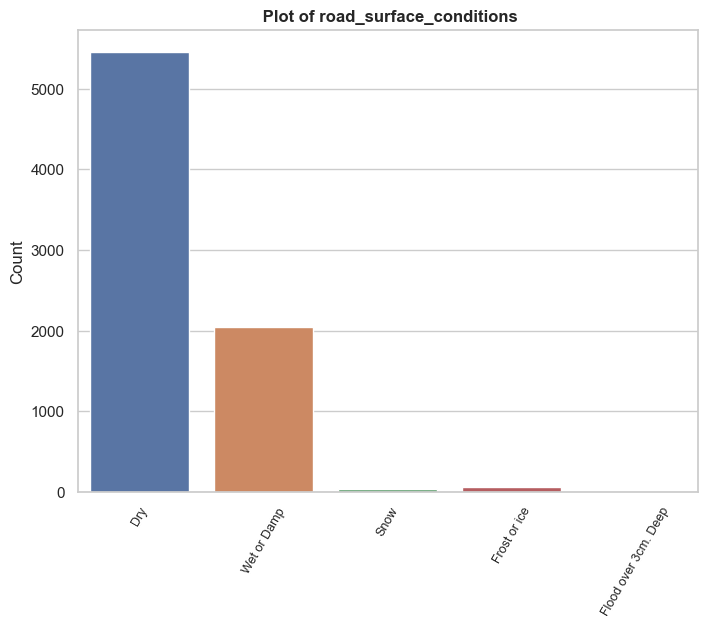

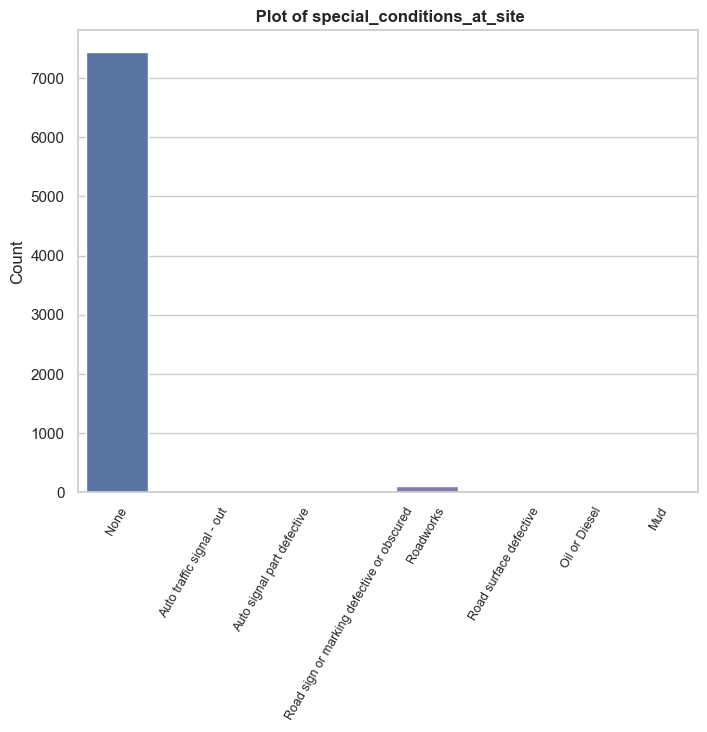

In [193]:
# Visualizes All categorical columns in bar chart format 
sns.set(style="whitegrid")

# Define the category to exclude
excluded_category = 'Category to Exclude'

# Identify categorical columns excluding 'generic_make_model'
categorical_columns = [col for col in car_df.select_dtypes(include=['category']).columns if col != 'generic_make_model']

# Plot seaborn's count plots for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    
    # Exclude the specified category
    data_to_plot = car_df[car_df[col] != excluded_category]
    
    sns.countplot(x=col, data=data_to_plot)
    plt.title(f' Plot of {col}', fontweight='bold')  # Make header bolder
    plt.xlabel('')  # Remove x-axis label
    plt.ylabel('Count')
    
    # Reduce label size and rotate labels vertically
    plt.xticks(rotation=60, fontsize=9)

    plt.show()


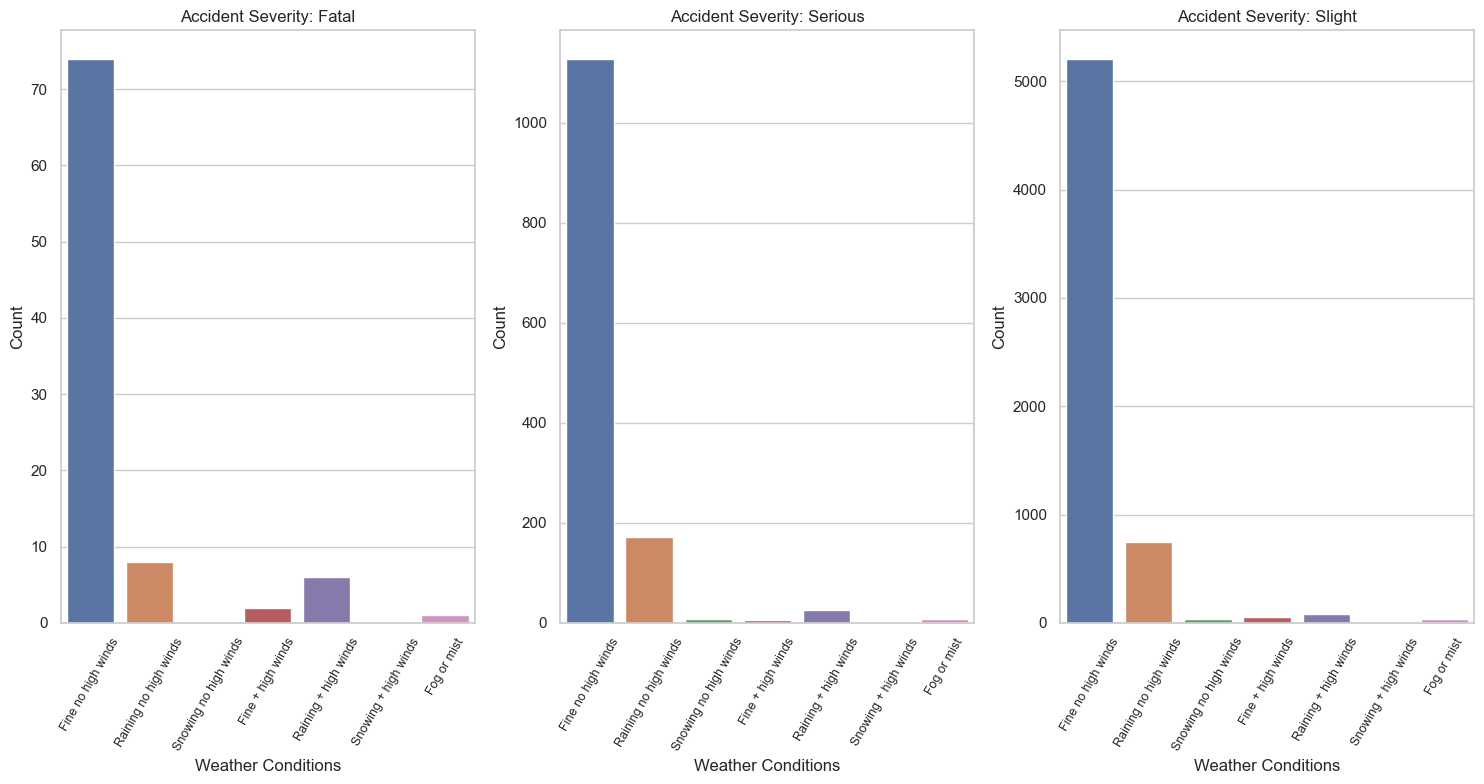

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
severity_counts = car_df.groupby(['accident_severity', 'weather_conditions']).size().reset_index(name='count')

# Get unique severity classes
severity_classes = severity_counts['accident_severity'].unique()

# Plot each severity class separately
plt.figure(figsize=(15, 8))

for i, severity_class in enumerate(severity_classes, start=1):
    plt.subplot(1, 3, i)
    data_subset = severity_counts[severity_counts['accident_severity'] == severity_class]
    sns.barplot(x='weather_conditions', y='count', data=data_subset)
    plt.title(f'Accident Severity: {severity_class}')
    plt.xlabel('Weather Conditions')
    plt.ylabel('Count')
    plt.xticks(rotation=60, fontsize=9)
plt.tight_layout()
plt.show()


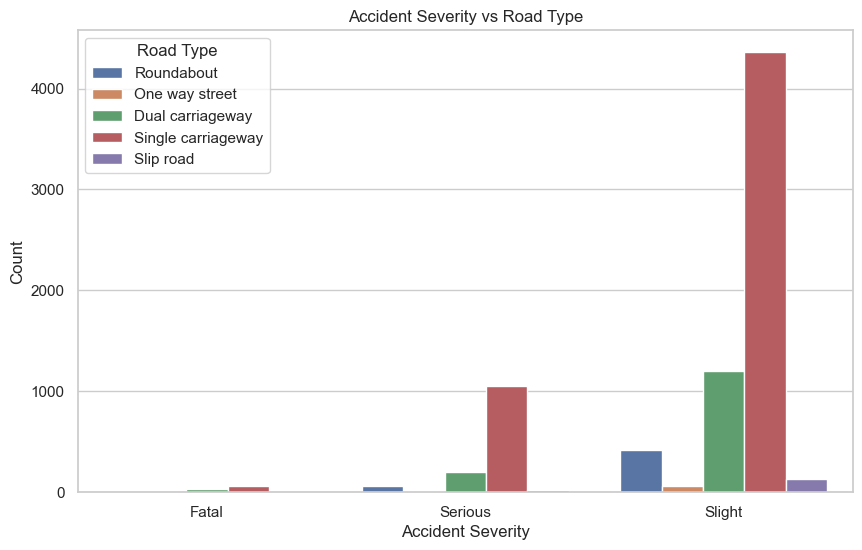

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each combination of accident severity and road type
severity_counts = car_df.groupby(['accident_severity', 'road_type']).size().reset_index(name='count')

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='accident_severity', y='count', hue='road_type', data=severity_counts)
plt.title('Accident Severity vs Road Type')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.legend(title='Road Type')
plt.show()



- The graph reveals that roundabouts are the most common type of road with 4000 fatal accidents, followed by one-way streets with 1000 accidents, dual carriageways with 3000, and single carriageways with 2000

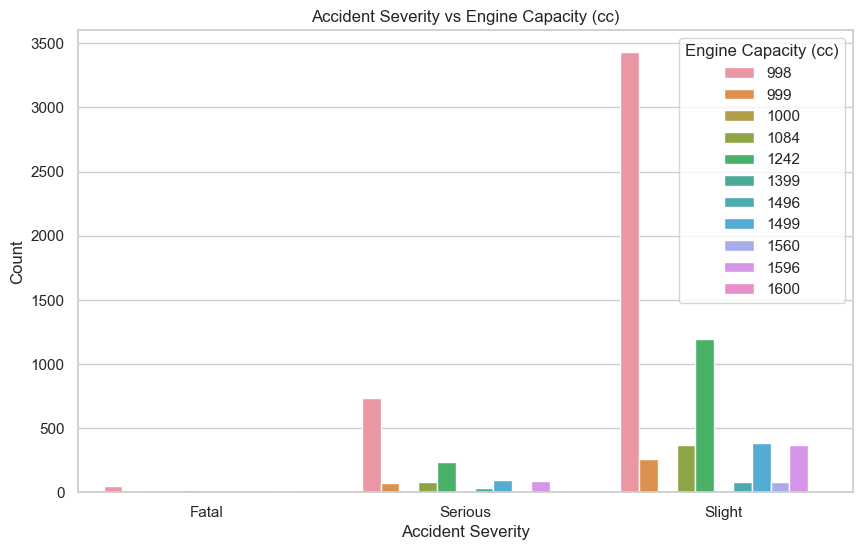

In [196]:

# Count occurrences of each combination of accident severity and engine capacity
severity_counts = car_df.groupby(['accident_severity', 'engine_capacity_cc']).size().reset_index(name='count')

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='accident_severity', y='count', hue='engine_capacity_cc', data=severity_counts)
plt.title('Accident Severity vs Engine Capacity (cc)')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.legend(title='Engine Capacity (cc)')
plt.show()


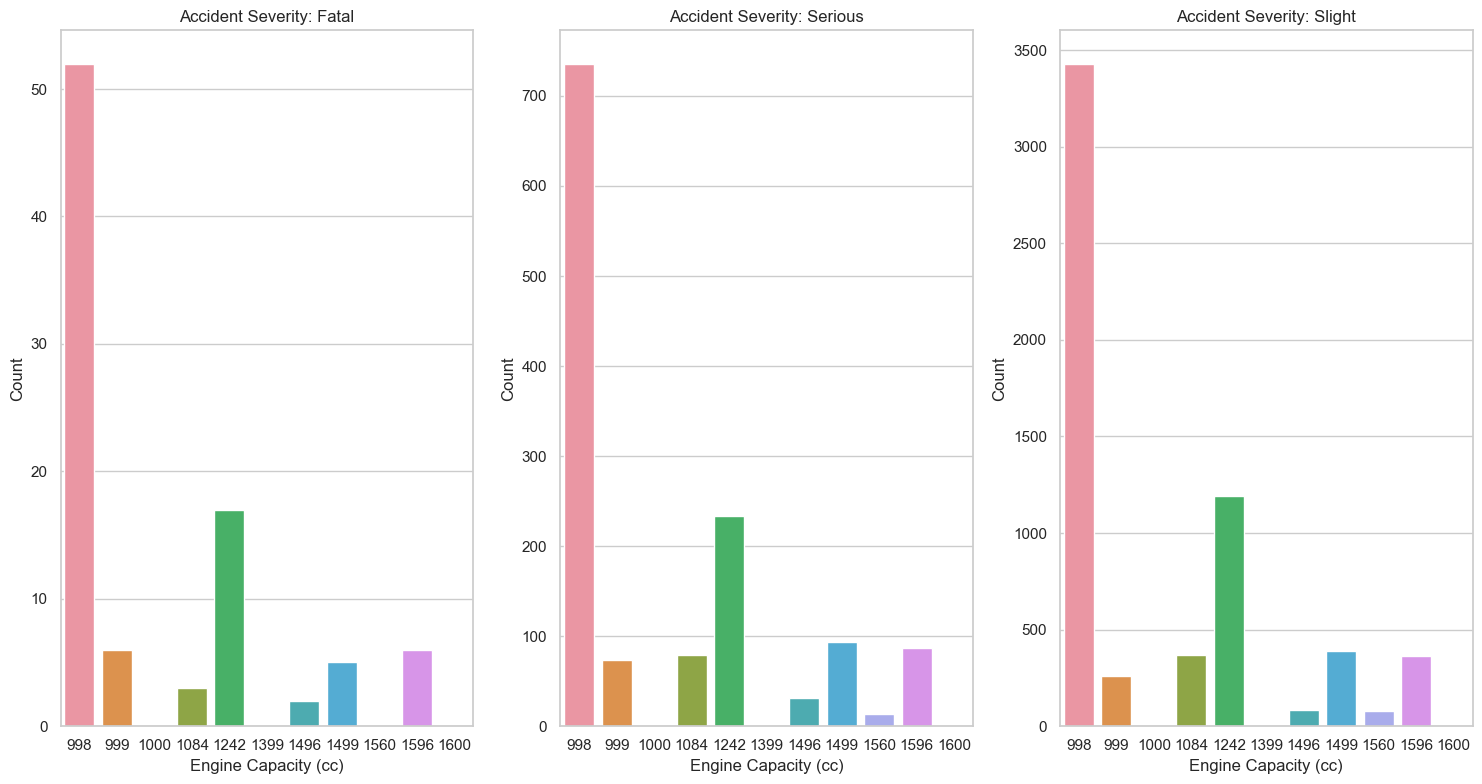

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
severity_counts = car_df.groupby(['accident_severity', 'engine_capacity_cc']).size().reset_index(name='count')

# Get unique severity classes
severity_classes = severity_counts['accident_severity'].unique()

# Plot each severity class separately
plt.figure(figsize=(15, 8))

for i, severity_class in enumerate(severity_classes, start=1):
    plt.subplot(1, 3, i)
    data_subset = severity_counts[severity_counts['accident_severity'] == severity_class]
    sns.barplot(x='engine_capacity_cc', y='count', data=data_subset)
    plt.title(f'Accident Severity: {severity_class}')
    plt.xlabel('Engine Capacity (cc)')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


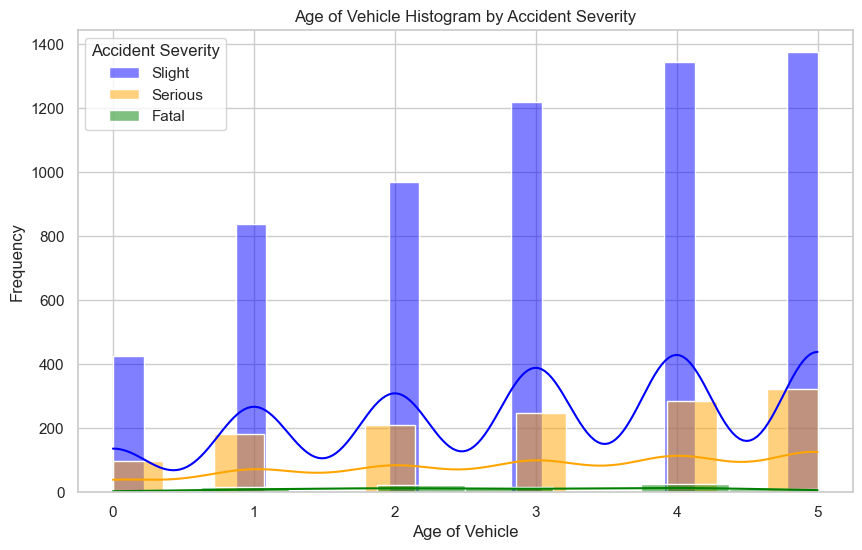

In [198]:

# Plot separate histograms for each severity level
plt.figure(figsize=(10, 6))

# Slight severity
sns.histplot(car_df[car_df['accident_severity'] == 'Slight']['age_of_vehicle'], color='blue', alpha=0.5, label='Slight', kde=True)

# Serious severity
sns.histplot(car_df[car_df['accident_severity'] == 'Serious']['age_of_vehicle'], color='orange', alpha=0.5, label='Serious', kde=True)

# Fatal severity
sns.histplot(car_df[car_df['accident_severity'] == 'Fatal']['age_of_vehicle'], color='green', alpha=0.5, label='Fatal', kde=True)

plt.title('Age of Vehicle Histogram by Accident Severity')
plt.xlabel('Age of Vehicle')
plt.ylabel('Frequency')
plt.legend(title='Accident Severity')
plt.show()


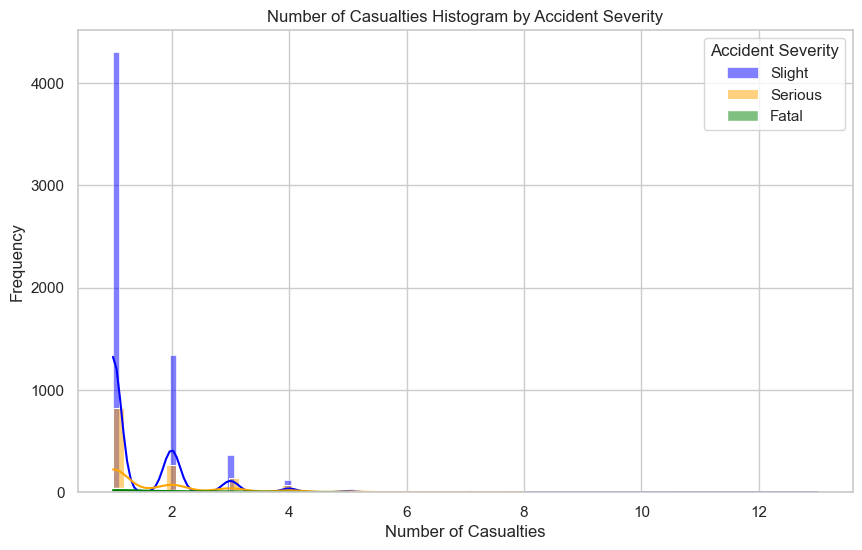

In [199]:
# Plot separate histograms for each severity level
plt.figure(figsize=(10, 6))

# Slight severity
sns.histplot(car_df[car_df['accident_severity'] == 'Slight']['number_of_casualties'], color='blue', alpha=0.5, label='Slight', kde=True)

# Serious severity
sns.histplot(car_df[car_df['accident_severity'] == 'Serious']['number_of_casualties'], color='orange', alpha=0.5, label='Serious', kde=True)

# Fatal severity
sns.histplot(car_df[car_df['accident_severity'] == 'Fatal']['number_of_casualties'], color='green', alpha=0.5, label='Fatal', kde=True)

# Show legend
plt.legend(title='Accident Severity')

plt.title('Number of Casualties Histogram by Accident Severity')
plt.xlabel('Number of Casualties')
plt.ylabel('Frequency')
plt.show()



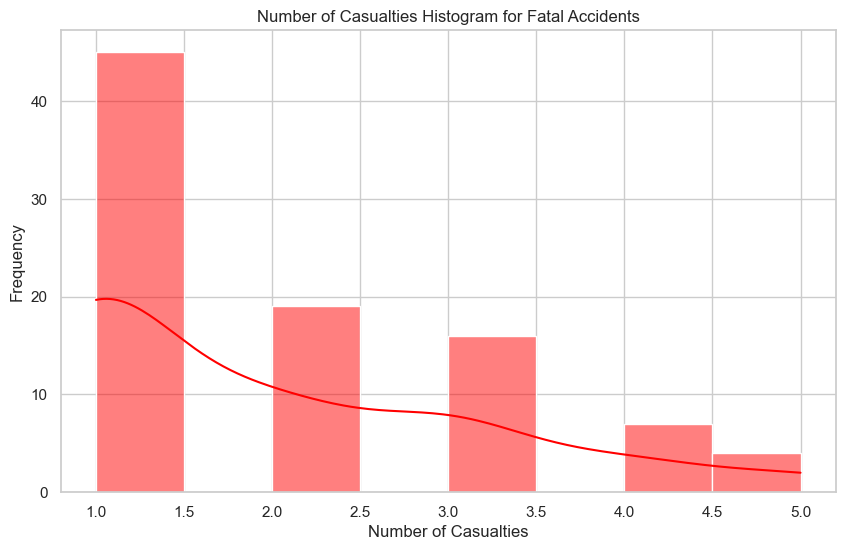

In [200]:
# Filter the DataFrame for instances where accident severity is "Fatal"
fatal_df = car_df[car_df['accident_severity'] == 'Fatal']

# Plot histogram for number of casualties for fatal accidents
plt.figure(figsize=(10, 6))
sns.histplot(fatal_df['number_of_casualties'], color='red', kde=True)
plt.title('Number of Casualties Histogram for Fatal Accidents')
plt.xlabel('Number of Casualties')
plt.ylabel('Frequency')
plt.show()


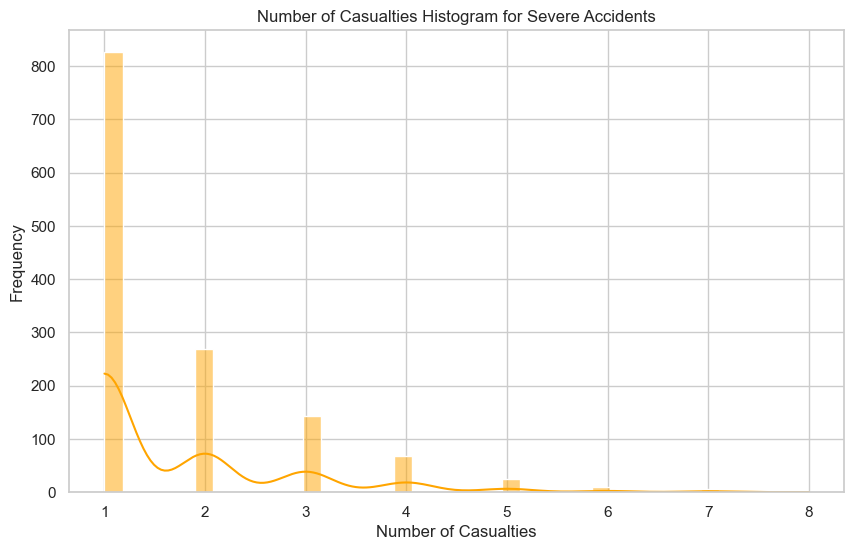

In [201]:
# Filter the DataFrame for instances where accident severity is "Serious"
severe_df = car_df[car_df['accident_severity'] == 'Serious']
# Plot histogram for number of casualties for severe accidents
plt.figure(figsize=(10, 6))
sns.histplot(severe_df['number_of_casualties'], color='orange', kde=True)
plt.title('Number of Casualties Histogram for Severe Accidents')
plt.xlabel('Number of Casualties')
plt.ylabel('Frequency')
plt.show()


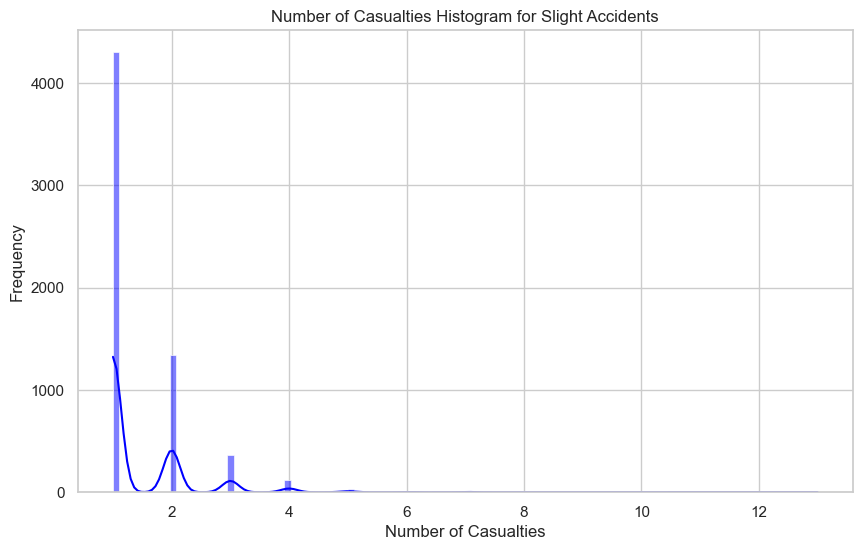

In [202]:
# Filter the DataFrame for instances where accident severity is "Slight"
slight_df = car_df[car_df['accident_severity'] == 'Slight']

# Plot histogram for number of casualties for slight accidents
plt.figure(figsize=(10, 6))
sns.histplot(slight_df['number_of_casualties'], color='blue', kde=True)
plt.title('Number of Casualties Histogram for Slight Accidents')
plt.xlabel('Number of Casualties')
plt.ylabel('Frequency')
plt.show()


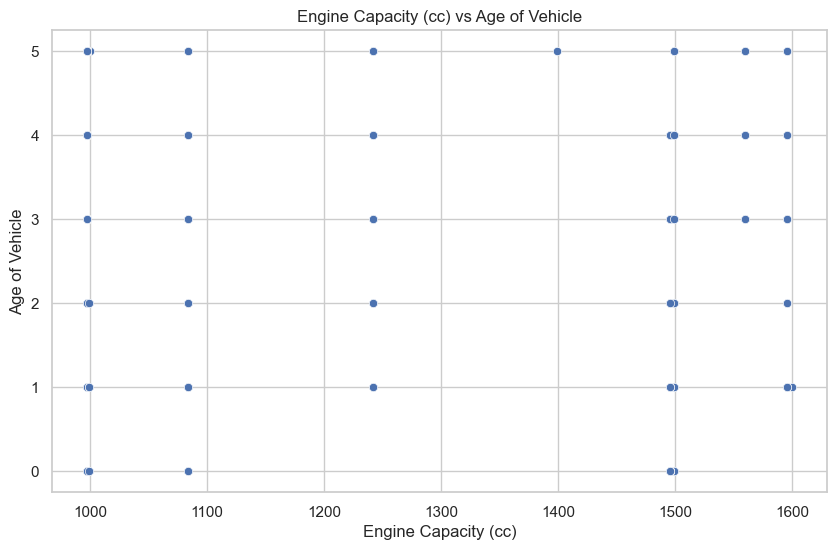

In [203]:
# Plot engine capacity (cc) vs age of vehicle
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine_capacity_cc', y='age_of_vehicle', data=car_df)
plt.title('Engine Capacity (cc) vs Age of Vehicle')
plt.xlabel('Engine Capacity (cc)')
plt.ylabel('Age of Vehicle')
plt.grid(True)
plt.show()


In [204]:
car_df.value_counts(['vehicle_manoeuvre'])

vehicle_manoeuvre                  
Going ahead other                      3611
Turn right                              866
Slowing or stopping                     602
Waiting to go - held up                 484
Moving off                              355
Parked                                  320
Going ahead right-hand bend             281
Turning left                            256
Going ahead left-hand bend              211
Waiting to turn right                   138
Overtaking moving vehicle - offside      99
Reversing                                69
U-turn                                   63
Changing lane to right                   59
Overtaking static vehicle - offside      58
Changing lane to left                    54
Waiting to turn left                     54
Overtaking - nearside                    26
Name: count, dtype: int64

In [205]:
car_df.value_counts(['first_point_of_impact'])

first_point_of_impact
Front                    3892
Back                     1489
Offside                  1105
Nearside                  956
Did not impact            164
Name: count, dtype: int64

In [206]:
car_df.value_counts(['engine_capacity_cc'])

engine_capacity_cc
998                   4219
1242                  1443
1499                   486
1596                   458
1084                   450
999                    340
1496                   116
1560                    91
1000                     1
1399                     1
1600                     1
Name: count, dtype: int64

In [207]:
car_df.value_counts(['special_conditions_at_site'])

special_conditions_at_site                
None                                          7433
Roadworks                                      115
Auto traffic signal - out                       17
Road sign or marking defective or obscured      13
Mud                                             11
Road surface defective                          10
Oil or Diesel                                    6
Auto signal part defective                       1
Name: count, dtype: int64

In [208]:
car_df.value_counts(['road_type'])

road_type         
Single carriageway    5473
Dual carriageway      1425
Roundabout             484
Slip road              148
One way street          76
Name: count, dtype: int64

In [209]:
car_df.value_counts(['light_conditions'])

light_conditions       
Daylight                   5508
Darkness - lights lit      1552
Darkness - no lighting      499
Darkness - lights unlit      47
Name: count, dtype: int64

In [210]:
car_df.value_counts(['weather_conditions'])

weather_conditions   
Fine no high winds       6411
Raining no high winds     924
Raining + high winds      112
Fine + high winds          64
Snowing no high winds      42
Fog or mist                41
Snowing + high winds       12
Name: count, dtype: int64

In [211]:
car_df.value_counts(['road_surface_conditions'])

road_surface_conditions
Dry                        5456
Wet or Damp                2041
Frost or ice                 68
Snow                         34
Flood over 3cm. Deep          7
Name: count, dtype: int64

In [212]:
car_df.value_counts(['propulsion_code'])

propulsion_code
Petrol             7028
Heavy oil           578
Name: count, dtype: int64

In [213]:
car_df.value_counts(['number_of_casualties'])

number_of_casualties
1                       5171
2                       1625
3                        520
4                        193
5                         60
6                         17
7                         17
8                          1
9                          1
13                         1
Name: count, dtype: int64

In [214]:
car_df.value_counts(['age_of_vehicle'])

age_of_vehicle
5                 1709
4                 1653
3                 1482
2                 1200
1                 1033
0                  529
Name: count, dtype: int64

- Vehicle Manoeuvre: The most common vehicle manoeuvre is "going ahead of another", followed by "turning right" and "slowing or stopping". This shows that straight movement and right turns are frequent manoeuvres in the dataset.

- First Point of Impact: The majority of incidents involve strikes on the front of vehicles, showing that frontal collisions are common.
The next most prevalent are rear hits, which are followed by offside and nearside vehicle impacts.

- Engine Capacity (cc): The dataset shows that the most common engine capacity is 998 cc, followed by 1242 cc and 1499 cc. Engine capacities vary greatly, with some models having capacities as large as 1600 cc.

- Special Conditions at Site: The majority of incidents occur under typical conditions, and none are described as unusual conditions. However, some accidents occur due to roadworks, poor traffic signs, dirt, or oil spills.

- Road Type: The most common road type in the dataset is single carriageway, followed by dual carriageway and roundabouts.

- Light Conditions: Accidents occur primarily in daytime, with a lesser proportion occurring in darkness with lights on. Several mishaps occur in the dark with no lighting.

- Weather Conditions: The majority of accidents occur during calm weather without strong winds. Rainy weather without high winds is the second most prevalent condition, followed by rainy weather with high winds.

- Road Surface Conditions: Accidents occur primarily on dry road surfaces, followed by wet or moist surfaces. Accidents occur less frequently on frosty or icy roads, and even less on snowy or flooded highways.

- Propulsion Code: Petrol-powered vehicles are far more common in the sample than heavy oil-powered ones.

- Number of Casualties: The majority of incidents result in only one casualty, followed by two. However, there have been reports of accidents with greater casualty numbers, with some involving up to 13 people.

- Age of Vehicle: The dataset contains the most vehicles aged 5 years or older, followed by those aged 4 and 3 years. The dataset also includes a considerable number of newer vehicles (ages 0 to 2 years).

# 9. Removal of Outliers from numerical columns using IQR

In [215]:
import numpy as np

# Define a function to remove outliers based on IQR for a single column and return a mask
def remove_outliers_iqr(column, lower_percentile=10, upper_percentile=90, threshold=1.5):
    # Calculate the first and third quartiles
    q1 = np.percentile(column, lower_percentile)
    q3 = np.percentile(column, upper_percentile)
    
    # Calculate the IQR
    iqr = q3 - q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    
    # Create a boolean mask indicating which rows contain outliers
    outlier_mask = (column < lower_bound) | (column > upper_bound)
    
    return outlier_mask

# Apply outlier removal to each numerical column and drop rows containing outliers
for column in ['age_of_vehicle', 'number_of_casualties']:
    outlier_mask = remove_outliers_iqr(car_df[column])
    car_df = car_df[~outlier_mask]

# Now, car_df contains the specified numerical columns with outliers removed and rows containing outliers dropped
car_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7586 entries, 109 to 989665
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   vehicle_manoeuvre           7586 non-null   category
 1   first_point_of_impact       7586 non-null   category
 2   engine_capacity_cc          7586 non-null   category
 3   propulsion_code             7586 non-null   category
 4   age_of_vehicle              7586 non-null   int64   
 5   accident_severity           7586 non-null   category
 6   number_of_casualties        7586 non-null   int64   
 7   road_type                   7586 non-null   category
 8   light_conditions            7586 non-null   category
 9   weather_conditions          7586 non-null   category
 10  road_surface_conditions     7586 non-null   category
 11  special_conditions_at_site  7586 non-null   category
dtypes: category(10), int64(2)
memory usage: 254.7 KB


In [216]:
car_df.value_counts(['number_of_casualties'])

number_of_casualties
1                       5171
2                       1625
3                        520
4                        193
5                         60
6                         17
Name: count, dtype: int64

# 10. Data splitting

In [217]:
# mapping for recoding accident_severity
severity_mapping = {
    'Fatal': 0,
    'Serious': 1,
    'Slight': 2
}

# Recode the column
car_df['accident_severity'] = car_df['accident_severity'].map(severity_mapping)


car_df.head()

,vehicle_manoeuvre,first_point_of_impact,engine_capacity_cc,propulsion_code,age_of_vehicle,accident_severity,number_of_casualties,road_type,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site
109,Going ahead other,Back,1242,Petrol,5,2,1,Single carriageway,Daylight,Fine no high winds,Dry,None
122,Moving off,Front,998,Petrol,4,1,1,Single carriageway,Daylight,Fine no high winds,Dry,None
205,Going ahead other,Nearside,998,Petrol,1,1,1,Dual carriageway,Darkness - lights unlit,Fine no high winds,Dry,None
463,Slowing or stopping,Back,998,Petrol,0,2,2,Dual carriageway,Daylight,Fine no high winds,Dry,None
466,Parked,Back,1242,Petrol,5,2,2,Dual carriageway,Daylight,Fine no high winds,Dry,None


In [218]:
car_df['accident_severity'].dtype

CategoricalDtype(categories=[0, 1, 2], ordered=False)

In [219]:
#Exported out the final dataset after preprocessing and cleaning
car_df.to_csv('Ford_models.csv', index=False)

In [220]:
# splitting the data into independent and dependent variables
X = car_df.drop('accident_severity', axis=1)
y = car_df['accident_severity']
 
#Assuming X contains your features and y contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 6068
Testing set size: 1518


In [221]:
y.value_counts(['accident_severity'])

accident_severity
2    0.811627
1    0.176378
0    0.011996
Name: proportion, dtype: float64

In [222]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6068 entries, 285058 to 767672
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   vehicle_manoeuvre           6068 non-null   category
 1   first_point_of_impact       6068 non-null   category
 2   engine_capacity_cc          6068 non-null   category
 3   propulsion_code             6068 non-null   category
 4   age_of_vehicle              6068 non-null   int64   
 5   number_of_casualties        6068 non-null   int64   
 6   road_type                   6068 non-null   category
 7   light_conditions            6068 non-null   category
 8   weather_conditions          6068 non-null   category
 9   road_surface_conditions     6068 non-null   category
 10  special_conditions_at_site  6068 non-null   category
dtypes: category(9), int64(2)
memory usage: 198.3 KB


In [223]:
X_train.value_counts(['first_point_of_impact'])

first_point_of_impact
Front                    3093
Back                     1202
Offside                   871
Nearside                  765
Did not impact            137
Name: count, dtype: int64

In [224]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1518 entries, 932638 to 392451
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   vehicle_manoeuvre           1518 non-null   category
 1   first_point_of_impact       1518 non-null   category
 2   engine_capacity_cc          1518 non-null   category
 3   propulsion_code             1518 non-null   category
 4   age_of_vehicle              1518 non-null   int64   
 5   number_of_casualties        1518 non-null   int64   
 6   road_type                   1518 non-null   category
 7   light_conditions            1518 non-null   category
 8   weather_conditions          1518 non-null   category
 9   road_surface_conditions     1518 non-null   category
 10  special_conditions_at_site  1518 non-null   category
dtypes: category(9), int64(2)
memory usage: 51.6 KB


In [225]:
X_test.value_counts(['first_point_of_impact'])

first_point_of_impact
Front                    786
Back                     283
Offside                  233
Nearside                 189
Did not impact            27
Name: count, dtype: int64

In [226]:
print(y.name)

accident_severity


In [227]:
from sklearn.preprocessing import LabelEncoder

 #Identify categorical columns
categorical_columns = ['propulsion_code','light_conditions','first_point_of_impact','road_surface_conditions', 'weather_conditions','vehicle_manoeuvre','engine_capacity_cc','road_type','special_conditions_at_site']


# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])

In [228]:
#Identify categorical columns
categorical_columns = ['propulsion_code','light_conditions','first_point_of_impact','road_surface_conditions', 'weather_conditions','vehicle_manoeuvre','engine_capacity_cc','road_type','special_conditions_at_site']

#Apply label encoding to categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    X_test[column] = label_encoder.fit_transform(X_test[column])

In [229]:
X_train.head()

,vehicle_manoeuvre,first_point_of_impact,engine_capacity_cc,propulsion_code,age_of_vehicle,number_of_casualties,road_type,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site
285058,2,2,0,1,3,3,3,0,4,4,3
58730,3,4,0,1,3,1,0,3,1,0,3
780396,13,2,0,1,5,2,3,3,4,4,3
145620,3,3,9,1,1,2,3,3,1,0,3
338057,17,0,4,1,3,2,3,3,1,0,3


In [230]:
X_test.head()

,vehicle_manoeuvre,first_point_of_impact,engine_capacity_cc,propulsion_code,age_of_vehicle,number_of_casualties,road_type,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site
932638,3,2,0,1,1,2,0,0,1,0,2
232187,3,2,0,1,1,1,3,3,1,3,2
382159,4,2,3,1,5,3,3,3,1,0,2
641802,3,2,7,1,5,1,4,0,1,0,2
610351,11,0,0,1,4,1,3,0,1,3,2


In [231]:
y_train.head()

285058    1
58730     2
780396    2
145620    2
338057    2
Name: accident_severity, dtype: category
Categories (3, int64): [0, 1, 2]

In [232]:
y_test.head()

932638    1
232187    2
382159    0
641802    1
610351    2
Name: accident_severity, dtype: category
Categories (3, int64): [0, 1, 2]

In [233]:
y_train.value_counts(['accident_severity'])

accident_severity
2    0.811635
1    0.176335
0    0.012030
Name: proportion, dtype: float64

In [234]:
y_test.value_counts(['accident_severity'])

accident_severity
2    0.811594
1    0.176548
0    0.011858
Name: proportion, dtype: float64

In both the training and test datasets, the majority class (accident severity level 2) is 81%, followed by severity level 1 (17%), and 0 (1%). This unbalanced distribution of classes highlights the importance of careful consideration during model training and evaluation, as models may demonstrate bias towards the majority class. Alternative encoding techniques such as one-hot encoding may be tested for model training. The features' data types and qualities are appropriate for training machine learning models, but feature scaling or normalisation may be required depending on the techniques used. Model performance should be evaluated using metrics other than accuracy, such as precision, recall, and F1-score.

In [235]:
%%javascript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "NOTEBOOK_FULL_PATH = '" + nb.notebook_path + "'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [236]:
import io
from nbformat import read, NO_CONVERT

with io.open(NOTEBOOK_FULL_PATH.split("/")[-1], 'r', encoding='utf-8') as f:
    nb = read(f, NO_CONVERT)

word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(f"Word count: {word_count}")

Word count: 1427
